# Data Analysis with `pandas`

(According to W3Schools it gets the name from **Pan**el **Da**ta and **P**ython **D**ata **A**nalysis)

<div>
<img src="https://pandas.pydata.org/static/img/pandas_white.svg" width="256"/>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # A surprise tool that'll help us later
pd.__version__

'2.0.1'

### Training Grounds

First, I read/tried/followed [a W3Schools tutorial](https://www.w3schools.com/python/pandas/default.asp):

#### The Series

In [2]:
# Series: A column of data
test_series = pd.Series([1, 2, 4, 8])
print(test_series)

# Can access like lists/arrays
print(test_series[0])

# Can give custom indices (labels)
test_series_2 = pd.Series([1, 2, 4, 8], index=['a', 'b', 'c', 'd'])
print(test_series_2)

# Access data with those indices
print(test_series_2['d'])

# Can also make a Series out of a dictionary - key->label
test_series_3 = pd.Series({'a': 1, 'b': 2, 'c': 4, 'd': 8})

# Apparently operations are performed per entry
test_series_2 == test_series_3

0    1
1    2
2    4
3    8
dtype: int64
1
a    1
b    2
c    4
d    8
dtype: int64
8


a    True
b    True
c    True
d    True
dtype: bool

#### The DataFrame

In [3]:
test_dataset = {
    'cars': ["Subaru", "Toyota", "Audi"],
    'passings': [6, 4, 1]
}

# DataFrame: A table of data
test_df = pd.DataFrame(test_dataset)

# Table-ify (tabulate?) a dictionary
print(test_df)

# loc contains the rows - access 1 row to get a Series
print(test_df.loc[0])

print()
# Can also use index to name the rows
test_df = pd.DataFrame(test_dataset, index=["make1", "make2", "make3"])
print(test_df)
print(test_df.loc["make1"])

     cars  passings
0  Subaru         6
1  Toyota         4
2    Audi         1
cars        Subaru
passings         6
Name: 0, dtype: object

         cars  passings
make1  Subaru         6
make2  Toyota         4
make3    Audi         1
cars        Subaru
passings         6
Name: make1, dtype: object


Importantly, you can import [many file types](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) as a DataFrame:

In [4]:
test_csv = pd.read_csv("w3schools_data.csv")

# Big data sets are truncated, thankfully
print(test_csv)
# Show only the first 5
print(test_csv.head())
print()

# Some helpful info
print(test_csv.info())
# Note that Calories has some null fields, which should be dealt with (cleaned)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]
   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null 

#### Data Cleaning

In [5]:
# Drop N/A will remove all rows with any column empty
test_clean = test_csv.dropna()
print(test_clean.info())
# There are now 164 rows

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    int64  
 1   Pulse     164 non-null    int64  
 2   Maxpulse  164 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB
None


In [6]:
# Let's also remove the duplicates. This time it's in place
test_clean.drop_duplicates(inplace=True)
print(test_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  157 non-null    int64  
 1   Pulse     157 non-null    int64  
 2   Maxpulse  157 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.1 KB
None


C:\Users\Austin\AppData\Local\Temp\ipykernel_42356\3026194000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clean.drop_duplicates(inplace=True)


#### Correlations

In [7]:
# Likelihood that there is a relationship, as a decimal percentage
# Sign indicates the slope of the relationship's line (positive or negative)
test_clean.corr()
# It looks like duration and calories have a strong positive relationship

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.167770,-0.000501,0.923053
Pulse,-0.167770,1.000000,0.784994,0.015301
Maxpulse,-0.000501,0.784994,1.000000,0.195309
Calories,0.923053,0.015301,0.195309,1.000000


#### Plots

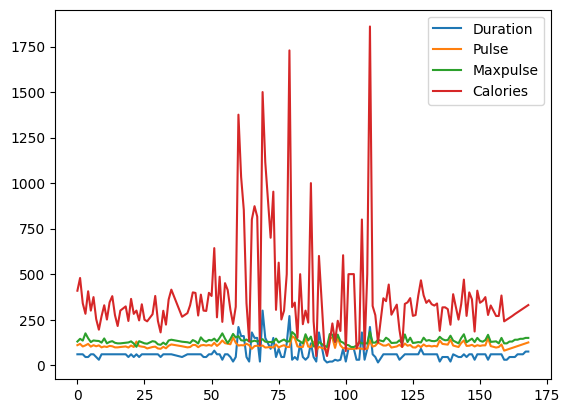

In [8]:
# Need Pyplot (from matplotlib)
import matplotlib.pyplot as plt

# Default settings
test_clean.plot()
plt.show()

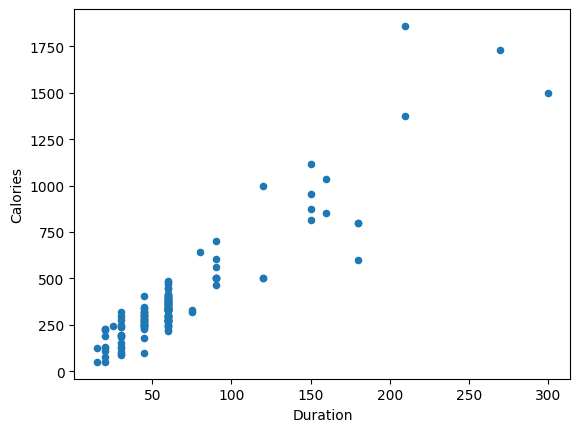

In [9]:
# Scatter plot of a strong correlation
test_clean.plot(kind="scatter", x="Duration", y="Calories")
plt.show()

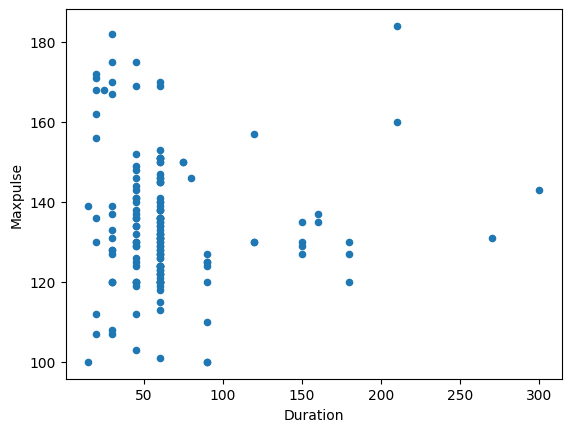

In [10]:
# Scatter plot of a weak correlation
test_clean.plot(kind="scatter", x="Duration", y="Maxpulse")
plt.show()

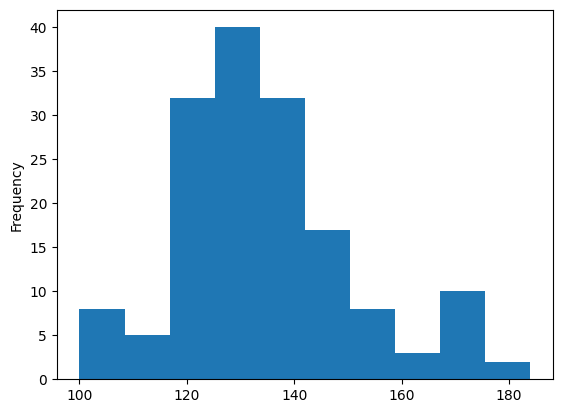

In [11]:
# Histogram (note that it takes a column)
test_clean["Maxpulse"].plot(kind="hist")
plt.show()

### [Minecraft Piracy Survey](https://www.kaggle.com/datasets/priyanshusethi/minecraft-piracy-dataset)

Uploaded to Kaggle by Priyanshu Sethi, this dataset was "extracted from a registration form of a major Minecraft event organized on discord."  
Since it's a survey and not hard data, people may not have been honest - results should be seen as representative of "Minecraft players who will admit to piracy." (Spoiler: Quite a lot.)

In [12]:
base_set = pd.read_csv("minecraft-piracy.csv")
print(base_set.info())
print()
print(base_set.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1422 non-null   float64
 1   client   1423 non-null   object 
 2   version  1423 non-null   object 
dtypes: float64(1), object(2)
memory usage: 33.5+ KB
None

    age                      client       version
0  14.0   Computer ( Java Edition )       Cracked
1  19.0   Computer ( Java Edition )       Cracked
2  18.0   Computer ( Java Edition )  Paid Version
3  17.0   Computer ( Java Edition )       Cracked
4  15.0  Mobile ( bedrock version )  Paid Version


First, let's clean it up a little. I saw in Excel that there were some bogus ages (1 and 2), let's confirm and fix that:

In [13]:
base_set.query("age < 6")

,age,client,version
31,2.0,Computer ( Java Edition ),Cracked
88,1.0,Computer ( Java Edition ),Cracked
97,2.0,Computer ( Java Edition ),Cracked
99,2.0,Computer ( Java Edition ),Cracked
181,1.0,Computer ( Java Edition ),Paid Version
198,2.0,Mobile ( bedrock version ),Cracked
204,2.0,Computer ( Java Edition ),Cracked
282,1.0,Computer ( Java Edition ),Cracked
294,1.0,Computer ( Java Edition ),Cracked
337,1.0,Computer ( Java Edition ),Cracked


That's quite a bit... Let's throw them out, the dataset is big enough.

In [14]:
base_set.query("age > 2", inplace=True) # removes ages <= 2
base_set.query("age < 10")

,age,client,version
250,8.0,Computer ( Java Edition ),Cracked
1153,9.0,Computer ( Java Edition ),Cracked
1307,6.0,Computer ( Java Edition ),Cracked


I'll assume these 3 are real ages, or, if not, underage.

#### Mom's credit card or crime? How many under-18s paid?

In [15]:
minors = base_set.query("age < 18")
print(minors)

       age                      client       version
0     14.0   Computer ( Java Edition )       Cracked
3     17.0   Computer ( Java Edition )       Cracked
4     15.0  Mobile ( bedrock version )  Paid Version
5     15.0   Computer ( Java Edition )       Cracked
7     16.0   Computer ( Java Edition )       Cracked
...    ...                         ...           ...
1418  17.0   Computer ( Java Edition )       Cracked
1419  15.0   Computer ( Java Edition )       Cracked
1420  17.0   Computer ( Java Edition )       Cracked
1421  15.0   Computer ( Java Edition )       Cracked
1422  14.0   Computer ( Java Edition )       Cracked

[960 rows x 3 columns]


In [16]:
# shape is a tuple containing (num_rows, num_columns)
num_minor_pirates = minors.query("version == \"Cracked\"").shape[0]
num_minor_payers  = minors.query("version == \"Paid Version\"").shape[0]

print(num_minor_pirates, num_minor_payers)

800 160


Oh dear. Let's see that in a pie:

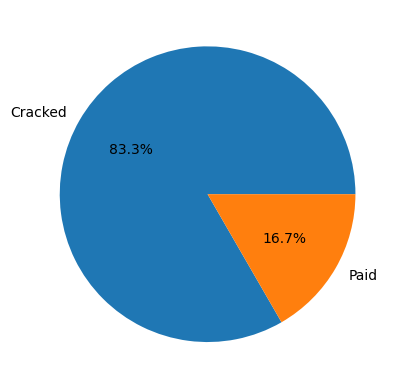

In [17]:
fig, ax = plt.subplots()
ax.pie([num_minor_pirates, num_minor_payers], labels=["Cracked", "Paid"], autopct='%1.1f%%')
plt.show()

#### What about the rest (adults)?

In [18]:
adults = base_set.query("age >= 18")
print(adults)

       age                      client       version
1     19.0   Computer ( Java Edition )       Cracked
2     18.0   Computer ( Java Edition )  Paid Version
6     20.0   Computer ( Java Edition )       Cracked
8     21.0   Computer ( Java Edition )  Paid Version
10    21.0   Computer ( Java Edition )  Paid Version
...    ...                         ...           ...
1394  21.0  Mobile ( bedrock version )       Cracked
1396  18.0   Computer ( Java Edition )  Paid Version
1399  21.0   Computer ( Java Edition )  Paid Version
1408  22.0   Computer ( Java Edition )       Cracked
1415  24.0   Computer ( Java Edition )       Cracked

[436 rows x 3 columns]


334 102


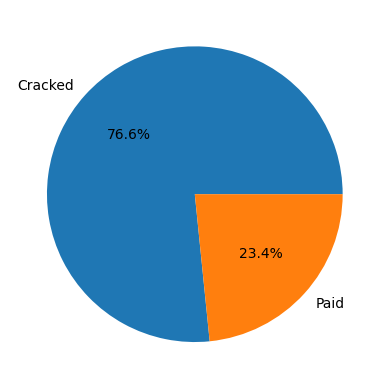

In [19]:
# shape is a tuple containing (num_rows, num_columns)
num_adult_pirates = adults.query("version == \"Cracked\"").shape[0]
num_adult_payers  = adults.query("version == \"Paid Version\"").shape[0]

print(num_adult_pirates, num_adult_payers)

fig, ax = plt.subplots()
ax.pie([num_adult_pirates, num_adult_payers], labels=["Cracked", "Paid"], autopct='%1.1f%%')
plt.show()

More adults pay for Minecraft.

#### Let's put it all together.

In [ ]:
# Just for visualization purposes
pd.DataFrame({
    "Adults": {"Paid" : 102, "Cracked": 334},
    "Minors": {"Paid" : 160, "Cracked": 800}
})

ModuleNotFoundError: No module named 'tomark'

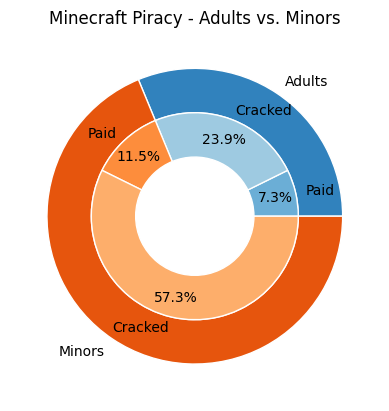

In [21]:
# Thank you matplotlib docs: https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html
import numpy as np
fig, ax = plt.subplots()

vals = np.array([[102, 334], [160, 800]])

size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels = ["Adults", "Minors"])

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, autopct='%1.1f%%', pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'), labels = ["Paid", "Cracked", "Paid", "Cracked"])

ax.set(aspect="equal", title='Minecraft Piracy - Adults vs. Minors')
plt.show()

#### Which edition (Java/Bedrock) was pirated more?

In [22]:
java = base_set.query("client == \"Computer ( Java Edition )\"")
bedrock = base_set.query("client == \"Mobile ( bedrock version )\"")
print(java)
print(bedrock)

       age                     client       version
0     14.0  Computer ( Java Edition )       Cracked
1     19.0  Computer ( Java Edition )       Cracked
2     18.0  Computer ( Java Edition )  Paid Version
3     17.0  Computer ( Java Edition )       Cracked
5     15.0  Computer ( Java Edition )       Cracked
...    ...                        ...           ...
1418  17.0  Computer ( Java Edition )       Cracked
1419  15.0  Computer ( Java Edition )       Cracked
1420  17.0  Computer ( Java Edition )       Cracked
1421  15.0  Computer ( Java Edition )       Cracked
1422  14.0  Computer ( Java Edition )       Cracked

[1139 rows x 3 columns]
       age                      client       version
4     15.0  Mobile ( bedrock version )  Paid Version
11    16.0  Mobile ( bedrock version )       Cracked
17    18.0  Mobile ( bedrock version )  Paid Version
19    16.0  Mobile ( bedrock version )       Cracked
23    20.0  Mobile ( bedrock version )  Paid Version
...    ...                       

957 182


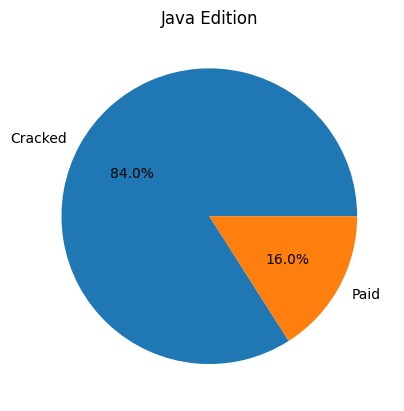

In [23]:
num_java_pirates = java.query("version == \"Cracked\"").shape[0]
num_java_payers  = java.query("version == \"Paid Version\"").shape[0]
print(num_java_pirates, num_java_payers)

fig, ax = plt.subplots()
ax.pie([num_java_pirates, num_java_payers], labels=["Cracked", "Paid"], autopct='%1.1f%%')
ax.set(title="Java Edition")
plt.show()

177 80


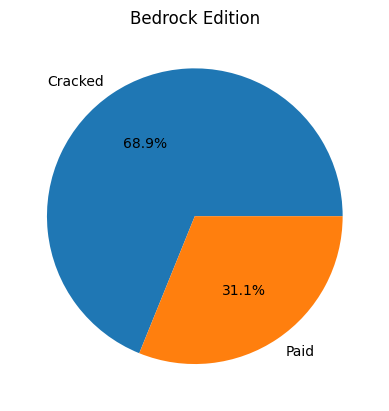

In [24]:
num_bedrock_pirates = bedrock.query("version == \"Cracked\"").shape[0]
num_bedrock_payers  = bedrock.query("version == \"Paid Version\"").shape[0]
print(num_bedrock_pirates, num_bedrock_payers)

fig, ax = plt.subplots()
ax.pie([num_bedrock_pirates, num_bedrock_payers], labels=["Cracked", "Paid"], autopct='%1.1f%%')
ax.set(title="Bedrock Edition")
plt.show()

Both editions are heavily pirated; it's worse on Java.

In [25]:
# Just for visualization purposes
pd.DataFrame({
    "Java": {"Paid" : num_java_payers, "Cracked": num_java_pirates},
    "Bedrock": {"Paid" : num_bedrock_payers, "Cracked": num_bedrock_pirates}
})

,Java,Bedrock
Paid,182,80
Cracked,957,177


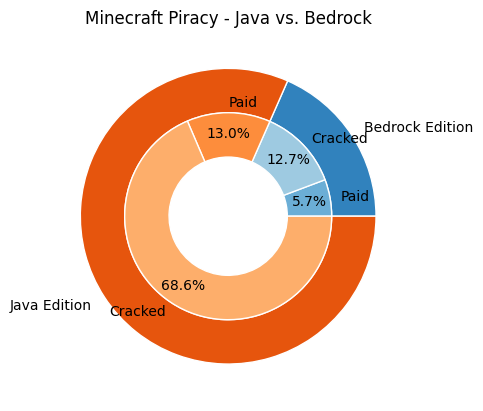

In [26]:
# Thank you matplotlib docs: https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html
import numpy as np
fig, ax = plt.subplots()

vals = np.array([[num_bedrock_payers, num_bedrock_pirates], [num_java_payers, num_java_pirates]])

size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels = ["Bedrock Edition", "Java Edition"])

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, autopct='%1.1f%%', pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'), labels = ["Paid", "Cracked", "Paid", "Cracked"])

ax.set(aspect="equal", title='Minecraft Piracy - Java vs. Bedrock')
plt.show()